## Import các thư viện cần thiết

In [1]:
import requests
import json
import pandas as pd
import numpy as np
import time
import datetime
import calendar
import seaborn as sns
import matplotlib.pyplot as plt

## Tiền xử lý và khám phá dữ liệu

### Khám phá dữ liệu

Đọc dữ liệu từ file csv vừa lưu ở trên

In [2]:
air_quality_df = pd.read_csv('./Data/air_quality.csv')

Tổng quan dữ liệu thu được

In [3]:
# Hiển thị 10 dòng đầu của dữ liệu
air_quality_df.head(10)

,dt,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,1609459200,3,700.95,0.44,35.99,17.35,32.90,20.33,26.64,8.99
1,1609462800,3,847.82,2.46,38.04,18.06,36.24,23.32,30.54,9.37
2,1609466400,3,894.55,5.25,38.39,23.25,41.01,24.16,31.93,9.25
3,1609470000,3,827.79,6.20,36.33,33.98,43.39,23.20,30.91,8.61
4,1609473600,2,660.90,3.69,29.13,54.36,35.76,19.50,25.60,6.21
5,1609477200,3,614.17,2.77,27.76,67.95,34.81,20.08,25.64,5.32
6,1609480800,3,600.82,2.38,26.05,80.82,34.33,21.10,26.28,5.00
7,1609484400,3,554.09,1.90,22.28,91.55,28.85,20.34,25.04,4.43
8,1609488000,2,514.03,1.17,20.74,85.83,24.32,17.08,21.14,3.96
9,1609491600,2,500.68,0.66,19.19,75.10,20.98,14.04,17.46,3.61


**Dữ liệu có bao nhiêu hàng, bao nhiêu cột?**

In [4]:
n_rows, n_cols = air_quality_df.shape

print(f"Dữ liệu có: {n_rows} hàng, {n_cols} cột.")

Dữ liệu có: 25177 hàng, 10 cột.


**Dữ liệu các dòng có bị lặp không?**

In [5]:
num_duplicated_rows = air_quality_df.duplicated().sum()
if num_duplicated_rows == 0:
    print(f"Dữ liệu không có dòng lặp.!")
else:
    print(f"Dữ liệu có {num_duplicated_rows} dòng lặp.")

Dữ liệu không có dòng lặp.!


Vậy là ta có đủ lượng dữ liệu cần và các dòng dữ liệu cũng không bị trùng lặp.

Chúng ta sẽ khám phá ý nghĩa của dữ liệu.

**Ý nghĩa của dữ liệu**

- Quan sát tổng thể ta có thể thấy mỗi dòng là số liệu của các loại chất để xác định mức độ ô nhiễm.

- Trong dữ liệu có cột dt để lưu lại thời gian ghi nhận số liệu, thời gian ghi nhận tính từ `01 tháng 01 năm 2022 00:00:00` đến `01 tháng 12 năm 2023 00:00:00`. Mỗi dòng là số liệu ghi nhận sau 1 giờ đồng hồ (mỗi dòng hơn nhau 3600 đơn vị).

- Bên cạnh đó ta có chỉ số chất lượng không khí là aqi. Các giá trị có thể có: 1, 2, 3, 4, 5. Trong đó:
    - 1 : Tốt
    - 2 : Khá
    - 3 : Trung bình
    - 4 : Kém
    - 5 : Rất Kém
- Dữ liệu trả về cũng bao gồm hàm lượng các chất ô nhiễm như sau:
    - CO (Carbon Monoxide - Monoxit Carbon):

        - Là khí màu không, không mùi, được tạo ra từ quá trình đốt cháy không hoàn toàn của nhiên liệu hóa thạch (như xăng, khí tự nhiên, than, và gỗ).
        - Thường được phát thải từ các phương tiện giao thông, quá trình công nghiệp và nguồn gốc tự nhiên.
        - Tiếp xúc với nồng độ cao có thể gây đau đầu, chóng mặt, buồn nôn và trong các trường hợp nghiêm trọng có thể gây tử vong.
    - NO (Nitric Oxide - Nitơ Oxít) và NO2 (Nitrogen Dioxide - Nitơ Điôxít):

        - Cả hai đều là khí được tạo ra từ quá trình đốt cháy, chủ yếu từ các phương tiện giao thông và hoạt động công nghiệp.
        - NO là chất tiền thân của NO2 trong không khí.
        - NO2 góp phần tạo thành sương mù và mưa axit.
        - Tiếp xúc lâu dài có thể gây ra các vấn đề về hệ hô hấp và làm trầm trọng thêm các bệnh về phổi như hen suyễn và các bệnh về phổi khác.
    - O3 (Ozone - Ozon):

        - Là khí gồm ba nguyên tử ôxy.
        - Được tạo thành từ phản ứng hóa học giữa oxít nitơ (NOx) và các hợp chất hữu cơ bay hơi (VOC) dưới ánh nắng mặt trời.
        - Ở mức độ sát đất, ozone là thành phần chính của sương mù.
        - Hít thở ozone có thể gây kích ứng họng, ho, đau ngực và làm trầm trọng các vấn đề về hệ hô hấp.
    - SO2 (Sulfur Dioxide - Lưu huỳnh Điôxít):

        - Là khí được tạo ra từ đốt cháy nhiên liệu hóa thạch chứa lưu huỳnh (than và dầu) và các quá trình công nghiệp (như khai thác kim loại).
        - Đóng góp lớn vào việc tạo ra mưa axit.
        - Hít thở SO2 có thể gây kích ứng mũi và họng, vấn đề hô hấp và làm trầm trọng các vấn đề về hen suyễn.
    - PM2.5 và PM10 (Chất hạt bụi):

        - PM2.5 đề cập đến các hạt bụi nhỏ có đường kính thường là 2.5 micromet và nhỏ hơn.
        - PM10 bao gồm các hạt có đường kính lên đến 10 micromet.
        - Nguồn gốc bao gồm phát thải từ phương tiện giao thông, quá trình công nghiệp, hoạt động xây dựng và các nguồn tự nhiên như bão cát.
        - PM2.5 và PM10 có thể xâm nhập sâu vào phổi và gây ra các vấn đề về hô hấp, vấn đề về tim mạch và các tác động khác đối với sức khỏe.
    - NH3 (Ammonia - Amoniac):

        - Là hợp chất chủ yếu được phát ra từ hoạt động nông nghiệp, chất thải động vật và các quá trình công nghiệp.
        - Đóng góp vào việc tạo ra các hạt bụi mịn và có thể phản ứng với các chất ô nhiễm khác trong không khí.
        - Hít thở NH3 có thể gây kích ứng mắt, mũi và họng.
    
Chi tiết về thang đo ô nhiễm nằm ở bảng sau:
         <table class="material-table">
<thead>
  <tr>
    <th>Qualitative name</th>
    <th>Index</th>
    <th colspan="6">Pollutant concentration in &mu;g/m<sup>3</sup></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td  colspan="2"></td>
    <td >SO<sub>2</sub></td>
    <td >NO<sub>2</sub></td>
    <td >PM<sub>10</sub></td>
    <td >PM<sub>2.5</sub></td>
    <td >O<sub>3</sub></td>
    <td >CO</td>
  </tr>
  <tr>
    <td >Good</td>
    <td >1</td>
    <td >[0; 20)</td>
    <td >[0; 40)</td>
    <td >[0; 20)</td>
    <td >[0; 10)</td>
    <td >[0; 60)</td>
    <td >[0; 4400)</td>
  </tr>
  <tr>
    <td >Fair</td>
    <td >2</td>
    <td >[20; 80)</td>
    <td >[40; 70)</td>
    <td >[20; 50)</td>
    <td >[10; 25)</td>
    <td >[60; 100)</td>
    <td >[4400; 9400)</td>
  </tr>
  <tr>
    <td >Moderate</td>
    <td >3</td>
    <td >[80; 250)</td>
    <td >[70; 150)</td>
    <td >[50; 100)</td>
    <td >[25; 50)</td>
    <td >[100; 140)</td>
    <td >[9400-12400)</td>
  </tr>
  <tr>
    <td >Poor</td>
    <td >4</td>
    <td >[250; 350)</td>
    <td >[150; 200)</td>
    <td >[100; 200)</td>
    <td >[50; 75)</td>
    <td >[140; 180)</td>
    <td >[12400; 15400)</td>
  </tr>
  <tr>
    <td >Very Poor</td>
    <td >5</td>
    <td >⩾350</td>
    <td >⩾200</td>
    <td >⩾200</td>
    <td >⩾75</td>
    <td >⩾180</td>
    <td >⩾15400</td>
  </tr>
</tbody>
</table>

### Chuyển đổi kiểu dữ liệu & xử lý dữ liệu bị thiếu

**Mỗi cột hiện có kiểu dữ liệu là gì? Có cột nào có kiểu dữ liệu không phù hợp để xử lý tiếp không?**

In [6]:
air_quality_df.dtypes

dt         int64
aqi        int64
co       float64
no       float64
no2      float64
o3       float64
so2      float64
pm2_5    float64
pm10     float64
nh3      float64
dtype: object

Ta quan sát thấy cột `dt` có kiểu `int64`. Mà cột `dt` là cột lưu lại thời gian ghi nhận số liệu, vì vậy ta có thể chuyển đổi cột `dt` sang kiểu `datetime`.

In [7]:
# chuyển cột 'dt' sang kiểu 'datetime'
air_quality_df['dt'] = pd.to_datetime(air_quality_df['dt'], unit='s')

# kiểm tra kết quả
air_quality_df.dtypes

dt       datetime64[ns]
aqi               int64
co              float64
no              float64
no2             float64
o3              float64
so2             float64
pm2_5           float64
pm10            float64
nh3             float64
dtype: object

Ta thấy aqi là chỉ số có giá trị từ 1-5 nên ta có thể chuyển cột `aqi` sang kiểu `category`

In [8]:
# chuyển cột 'aqi' sang kiểu 'category'
air_quality_df['aqi'] = air_quality_df['aqi'].astype('category')

# kiểm tra kết quả
air_quality_df.dtypes

dt       datetime64[ns]
aqi            category
co              float64
no              float64
no2             float64
o3              float64
so2             float64
pm2_5           float64
pm10            float64
nh3             float64
dtype: object

**Dữ liệu có bị thiếu không ?**

In [9]:
# Kiểm tra dữ liệu bị thiếu
missing_data = air_quality_df.isna().any()

if missing_data.any():
    print("Có dữ liệu bị thiếu:")
    print(missing_data)
else:
    print("Không có dữ liệu bị thiếu.")

Không có dữ liệu bị thiếu.


Không phải xử lý dữ liệu bị thiếu vì không có giá trị nào bị thiếu cần xử lý.

**Có dữ liệu không hợp lệ không?**

Với những cột có dữ liệu số, giá trị của chúng phải lớn hơn hoặc bằng 0

In [10]:
numeric_columns = air_quality_df.select_dtypes(include=['float64']).columns

# Kiểm tra xem các giá trị trong từng cột có bé hơn 0 không
for column in numeric_columns:
    values_smaller_than_zero = air_quality_df[air_quality_df[column] < 0]
    if values_smaller_than_zero.empty:
        print(f"Không có giá trị bé hơn 0 trong cột '{column}'")
    else:
        print(f"Có giá trị bé hơn 0 trong cột '{column}'")

Không có giá trị bé hơn 0 trong cột 'co'
Không có giá trị bé hơn 0 trong cột 'no'
Không có giá trị bé hơn 0 trong cột 'no2'
Có giá trị bé hơn 0 trong cột 'o3'
Không có giá trị bé hơn 0 trong cột 'so2'
Không có giá trị bé hơn 0 trong cột 'pm2_5'
Không có giá trị bé hơn 0 trong cột 'pm10'
Không có giá trị bé hơn 0 trong cột 'nh3'


Có giá trị bé hơn 0 ở cột `o3`, có thể xóa dòng đó ra khỏi data. Lưu data sau xử lý thành `cleaned_df` để sử dụng

In [11]:
# Tạo một mask để xác định các dòng có giá trị bé hơn 0
mask = (air_quality_df[numeric_columns] < 0).any(axis=1)

# Xóa các dòng có giá trị bé hơn 0 và lưu thành cleaned_
cleaned_df = air_quality_df[~mask]

# Hiển thị thông tin về số dòng bị xóa
rows_removed = air_quality_df.shape[0] - cleaned_df.shape[0]
print(f"Số dòng đã bị xóa: {rows_removed}")

Số dòng đã bị xóa: 1


Lưu data sau khi xử lý vào thư mục `/Data`

In [12]:
cleaned_df.to_csv('./data/air_quality_cleaned.csv', sep=',', encoding='utf-8', index=False)

### Với cột có kiểu dữ liệu non-numeric, chúng ta sẽ xem các giá trị đó được phân phối như thế nào?

Đối với các cột có kiểu dữ liệu không phải là số, nhóm em sẽ tính:
- Phần trăm (từ 0 đến 100) của giá trị thiếu sót.
- Số lượng giá trị (các giá trị ở đây là các giá trị khác nhau và không xét giá trị thiếu).
- Phần trăm (từ 0 đến 100) của mỗi giá trị được sắp xếp theo tỉ lệ phần trăm giảm dần.
- Lưu kết quả vào DataFrame cat_col_info_df, trong đó:
    - Tên của các cột là tên của các cột không phải là số trong air_quality_df.
    - Tên của các dòng là: "missing_ratio", "num_values", "value_ratios".

In [13]:
cat_col_info_df = cleaned_df.select_dtypes(include='category')

# Phần trăm missing value
def missing_ratio(series):
    return series.isna().mean() * 100

# Số lượng giá trị
def num_values(series):
    return series.nunique()

# Tỉ lệ mỗi giá trị
def value_ratios(series):
    value_ratios=(((series.value_counts(normalize=True)*100)).round(1)).to_dict()
    return value_ratios

cat_col_info_df = (cat_col_info_df.agg([missing_ratio, num_values, value_ratios]))

cat_col_info_df 

,aqi
missing_ratio,0.0
num_values,5
value_ratios,"{5: 39.3, 4: 24.1, 2: 19.2, 3: 14.6, 1: 2.7}"


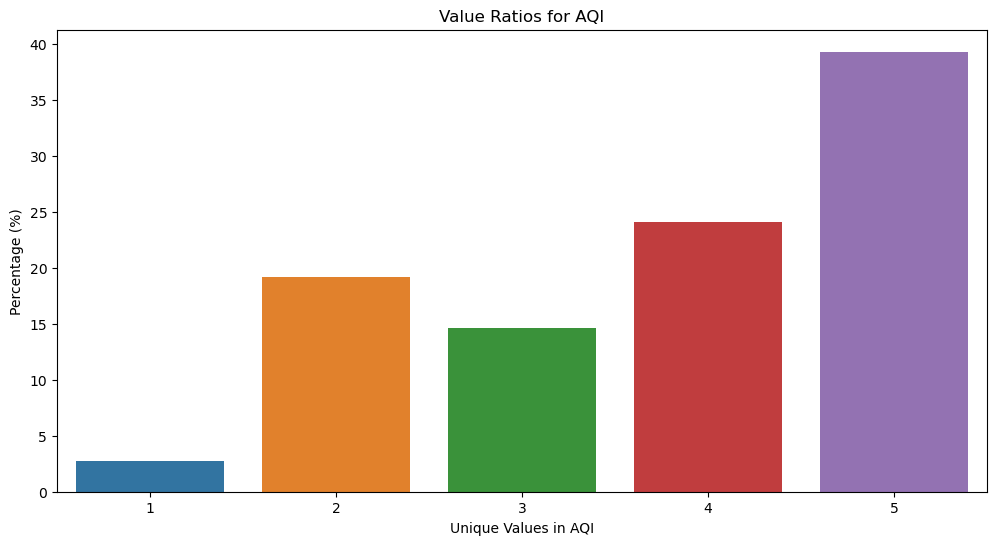

In [14]:
# Biểu đồ phân tán cho tỷ lệ giá trị
plt.figure(figsize=(12, 6))
sns.barplot(x=list(cat_col_info_df.loc['value_ratios']['aqi'].keys()), 
            y=list(cat_col_info_df.loc['value_ratios']['aqi'].values()))
plt.title('Value Ratios for AQI')
plt.xlabel('Unique Values in AQI')
plt.ylabel('Percentage (%)')
plt.show()

##### Nhận xét:
- Nhìn vào biểu đồ, ta có thể thấy được chất lượng không khí rất kém chiếm tỉ lệ cao nhất (39,3%), tiếp đến là chất lượng không khí kém (24,1%).
- Tỉ lệ chất lượng không khi ở mức khá cao hơn mức trung bình.
- Tỉ lệ chất lượng không khí tốt rất ít (chỉ 2,7%). 
- Vậy, không khí có chất lượng rất kém và kém rất phổ biển. Điều này có thể mang lại cái nhìn tổng quan về mức độ ô nhiễm không khí hiện nay.

### Với cột có kiểu dữ liệu numeric, chúng ta sẽ xem các giá trị đó được phân phối như thế nào?

Đối với các cột có kiểu dữ liệu số, nhóm em sẽ tính:
- Tỷ lệ phần trăm (từ 0 đến 100) giá trị bị thiếu
- Tối thiểu (Min)
- Tứ phân vị dưới (phân vị 25)
- Trung vị (phân vị 50)
- Tứ phân vị trên (phân vị 75)
- Tối đa (Max)
- Lưu kết quả vào DataFrame `num_col_info_df`, trong đó:
    - Tên của các cột là tên của các cột là số trong air_quality_df.
    - Tên của các dòng là: "missing_ratio", "min", "lower_quartile", "median", "upper_quartile", "max" .

In [15]:
num_col_info_df = None
num_col_info_df = cleaned_df.select_dtypes(['float64'])

# Phần trăm missing value
def missing_ratio(col):
    return col.isna().mean()*100

# Tứ phân vị dưới (25%)
def lower_quartile(col):
    return col.quantile(0.25)

# Trung vị (50%)
def median(col):
    return col.median()

# Tứ phân vị trên (75%)
def upper_quartile(col):
    return col.quantile(0.75)


num_col_info_df = num_col_info_df.agg([missing_ratio, "min",lower_quartile, median, upper_quartile, "max"])
num_col_info_df.round(1)
# 

,co,no,no2,o3,so2,pm2_5,pm10,nh3
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,317.1,0.0,6.3,0.0,5.8,3.4,4.7,1.5
lower_quartile,701.0,1.8,24.3,0.0,27.2,23.3,31.0,6.0
median,1041.4,9.8,33.2,3.9,38.6,42.2,53.3,8.5
upper_quartile,1762.4,32.6,45.9,31.1,57.7,80.8,98.6,12.4
max,18585.2,393.4,213.9,446.3,270.8,936.1,1034.3,186.4


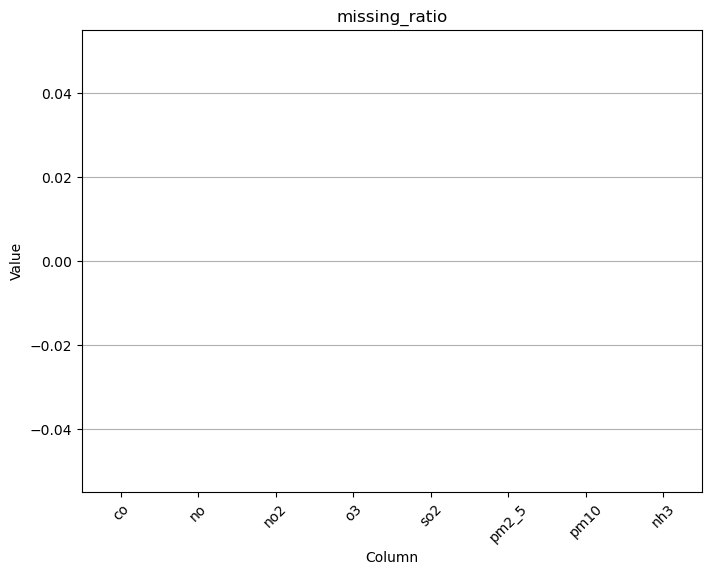

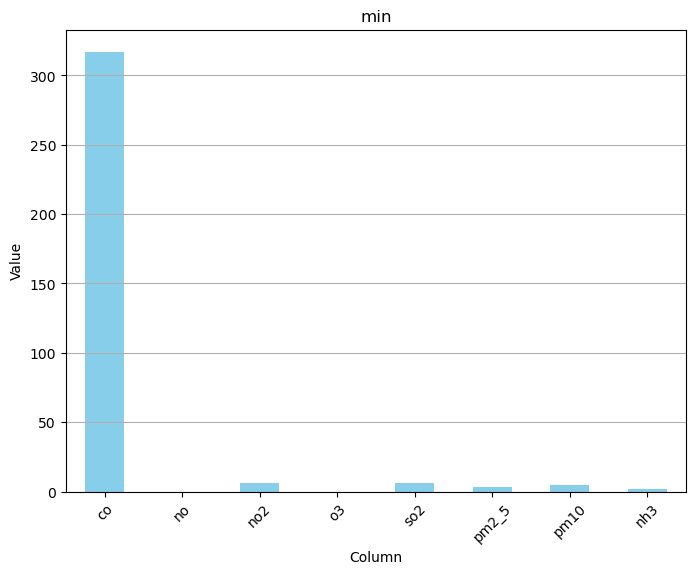

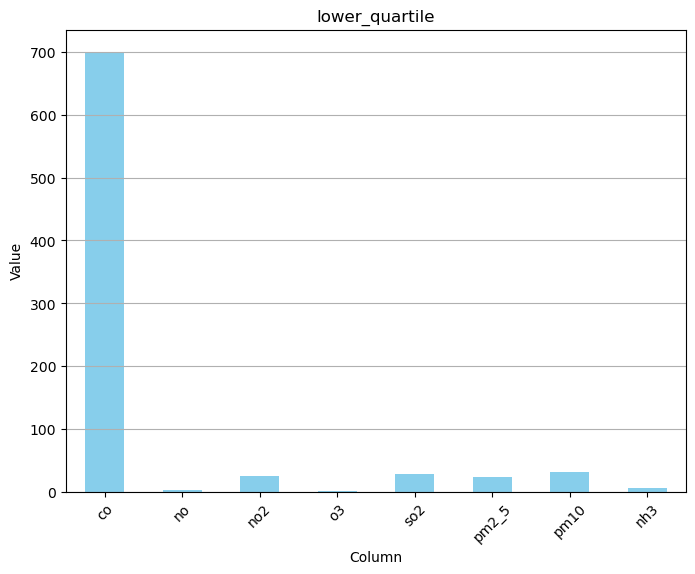

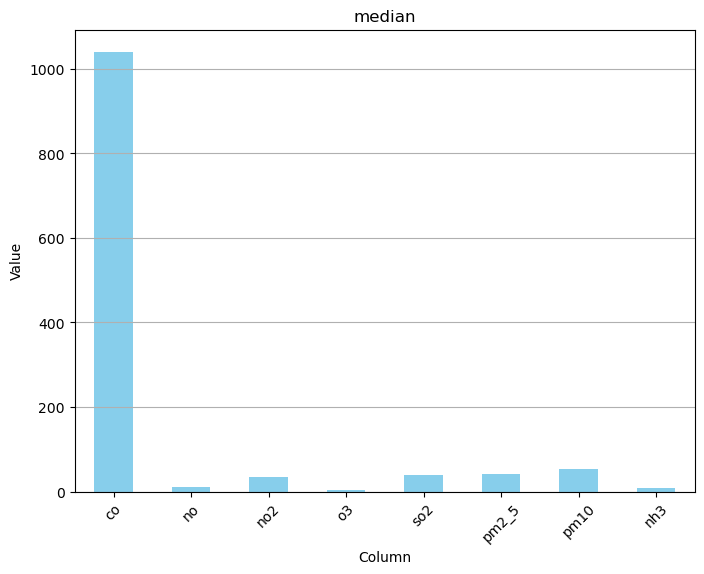

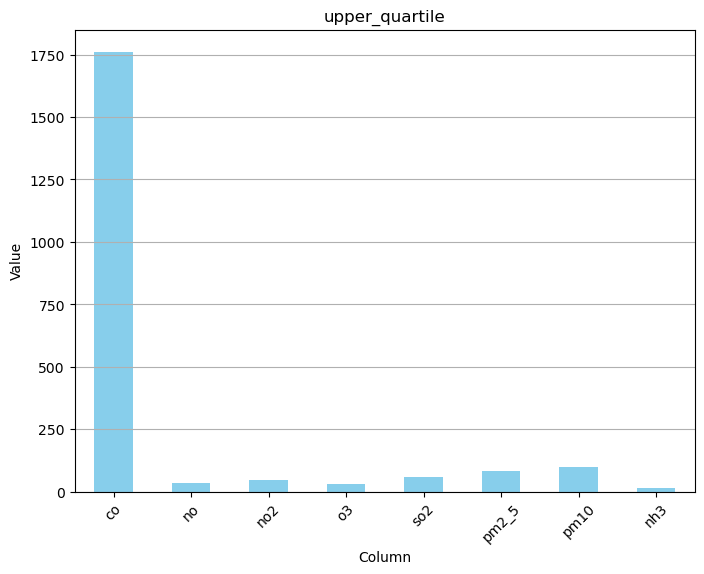

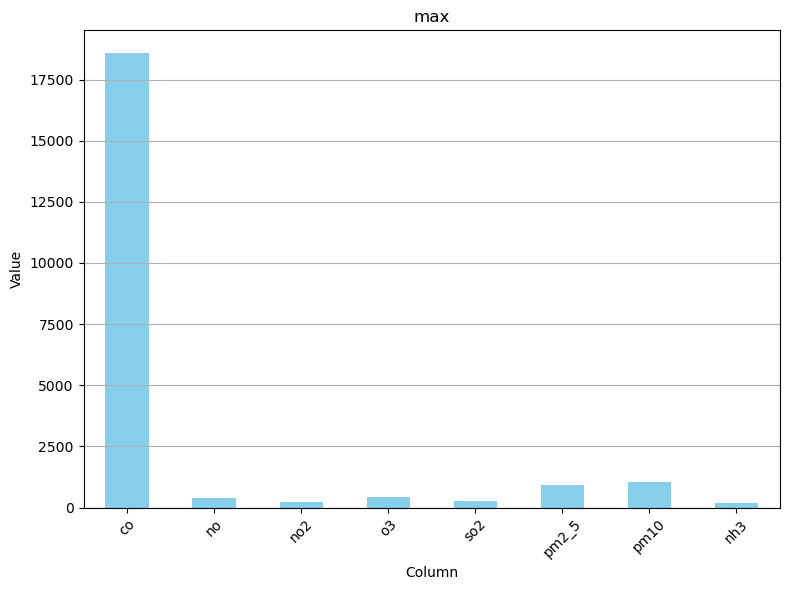

In [16]:
# Biểu đồ phân tán cho từng thông số
attributes = ["missing_ratio", "min", "lower_quartile", "median", "upper_quartile", "max"]
for index, atr in enumerate(attributes):
    row = num_col_info_df.loc[atr]

    # Vẽ biểu đồ cột
    plt.figure(figsize=(8, 6))
    row.plot(kind='bar', color='skyblue')
    plt.title(f'{atr}')
    plt.xlabel('Column')
    plt.ylabel('Value')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    
plt.tight_layout()
# Hiển thị biểu đồ
plt.show()

### Số liệu thống kê và quan hệ giữa các thuộc tính trong dữ liệu

Trước tiên chúng em có những cái nhìn đầu tiên về số liệu thông qua **Bảng thống kê mô tả** sau.

In [17]:
# Lấy các cột có kiểu dữ liệu số
df_copy = cleaned_df.drop(['dt', 'aqi'], axis='columns')

# Bảng thống kê mô tả
summary = df_copy.describe(include='all')
summary

,co,no,no2,o3,so2,pm2_5,pm10,nh3
count,25176.000000,25176.000000,25176.000000,25176.000000,25176.000000,25176.000000,25176.000000,25176.000000
mean,1564.624598,25.563557,38.507225,24.752132,46.831247,69.768048,84.222009,10.902587
std,1541.296007,39.523765,21.190291,43.129492,29.082228,82.862849,93.248424,9.658485
min,317.100000,0.000000,6.340000,0.000000,5.840000,3.450000,4.670000,1.520000
25%,700.950000,1.750000,24.330000,0.020000,27.180000,23.290000,30.950000,6.020000
50%,1041.410000,9.830000,33.240000,3.890000,38.620000,42.235000,53.345000,8.490000
75%,1762.390000,32.630000,45.930000,31.110000,57.700000,80.842500,98.580000,12.410000
max,18585.210000,393.390000,213.860000,446.320000,270.840000,936.130000,1034.270000,186.440000


Bảng trên cho ta những thống kê về số lượng (`count`), trung bình (`mean`), độ lệch chuẩn (`std`) và phân bố của dữ liệu theo tứ phân vị (`min, 25%, 50%, 75%, max`). 

Để có thêm những cái nhìn về dữ liệu, chúng em xem xét thêm **mối quan hệ giữa các cột** dựa vào biểu đồ heatmap.

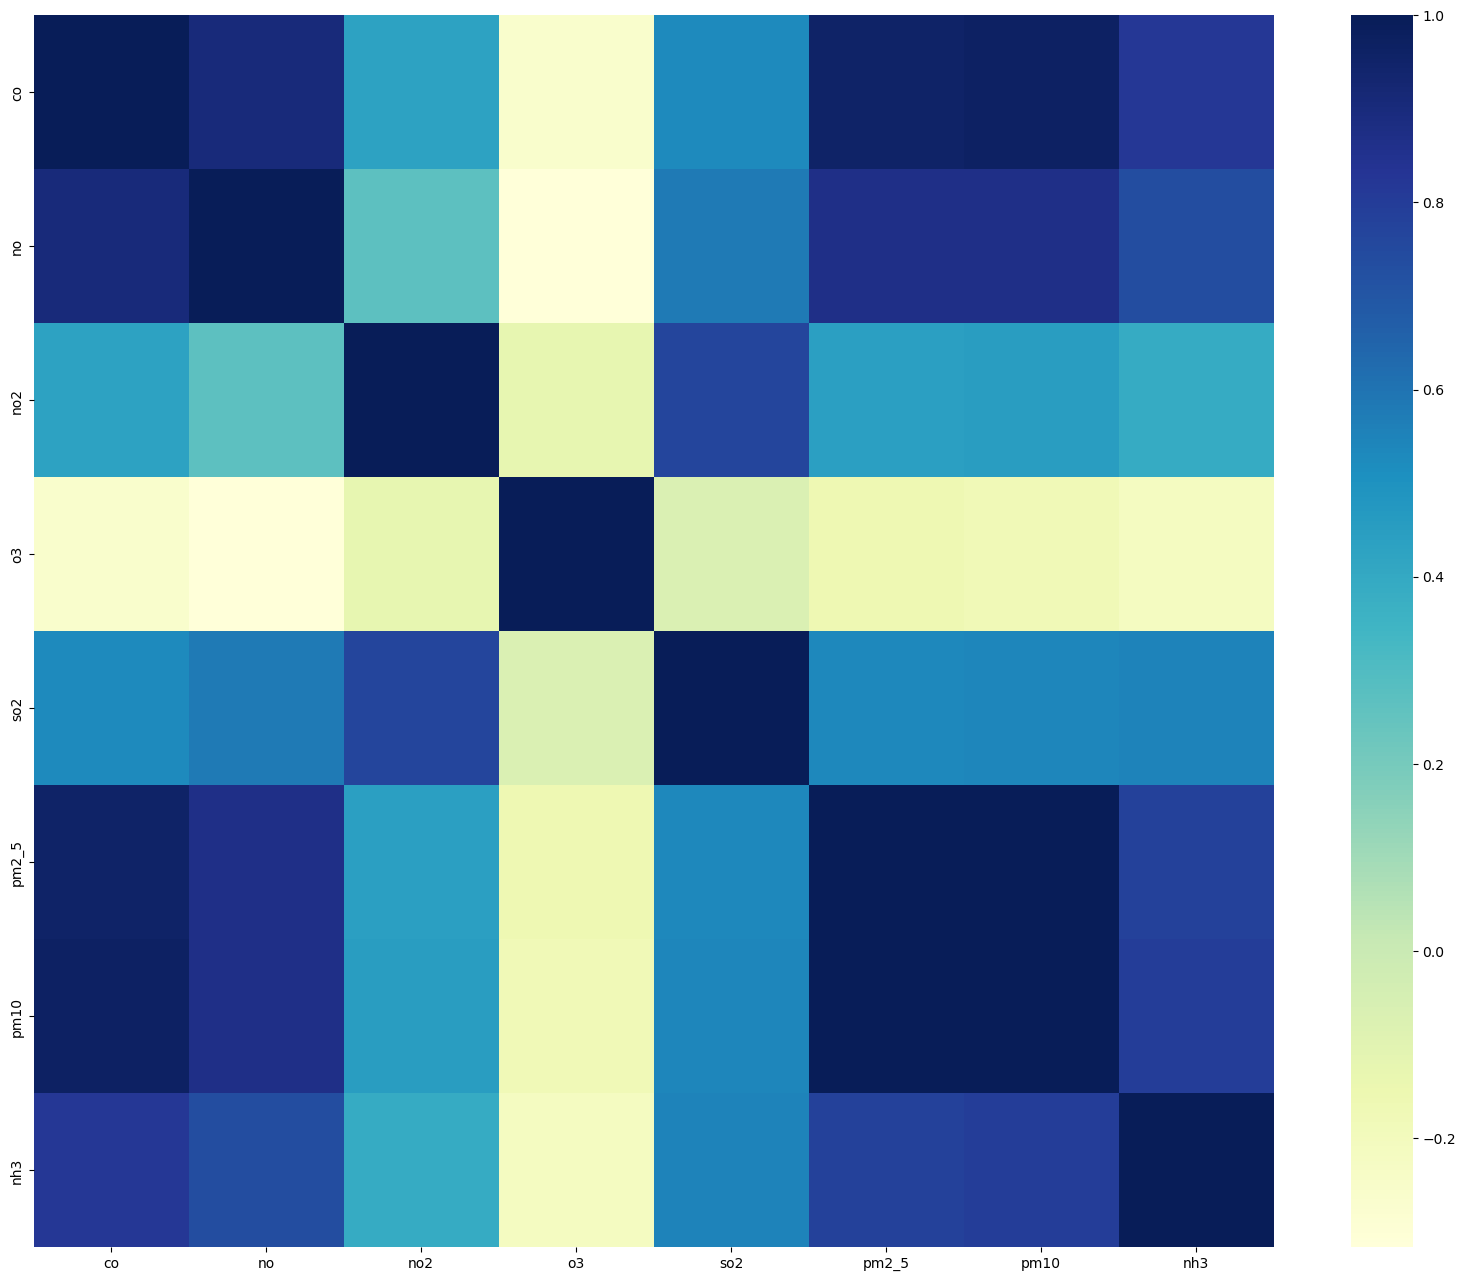

In [18]:
# Visualize correlation
plt.figure(figsize = (20,16))
sns.heatmap(df_copy.corr(), cmap = "YlGnBu")
plt.show()

Dựa vào heat map về mối quan hệ giữa các cột như trên, ta có thể thấy hầu hết các cột đều đều có mối quan hệ dương, trừ `o3` với các cột còn lại. Điều này cho thấy các cột có thể có quan hệ đồng biến với nhau.

### Đặt câu hỏi để khai thác dữ liệu

Sau khi đã khám phá dữ liệu và có cái nhìn tổng quan về dữ liệu, chúng em tiến hành khai thác dữ liệu thông qua những câu hỏi sau:

#### 1. Tình hình biến đổi của chỉ số bụi (PM2.5, PM10) trong khu vực nghiên cứu trong thời điểm gần nhất (tháng 11/2023) là như thế nào?
- **Trả lời câu hỏi này** sẽ giúp hiểu rõ hơn về mức độ ô nhiễm không khí vì bụi trong thời kỳ gần đây và có thể đánh giá tình hình ô nhiễm ở giai đoạn cụ thể này.
- **Để trả lời câu hỏi này**, chúng ta sẽ xét trung bình của hai chỉ số PM2.5 và PM10 trong khoảng thời gian tháng 11/2023 theo từng ngày.

In [19]:
# Tạo bản sao của data
temp_df = cleaned_df[['dt', 'pm2_5', 'pm10']]

# Đặt cột 'dt' làm index
temp_df.set_index('dt', inplace=True)

# Group dữ liệu theo ngày 
daily_data = temp_df.resample('D').mean()  # Lấy giá trị trung bình hàng ngày

# Reset index để có DataFrame với cột 'dt' trở thành một cột thông thường
daily_data.reset_index(inplace=True)

In [20]:
# Lấy dữ liệu trong tháng 11/2023
november_2023_data = daily_data[(daily_data['dt'].dt.year == 2023) & (daily_data['dt'].dt.month == 11)]

# Lấy 2 chỉ số hạt bụi
november_2023_data

,dt,pm2_5,pm10
1034,2023-11-01,140.233750,160.085000
1035,2023-11-02,96.292500,112.643333
1036,2023-11-03,152.972917,174.512083
1037,2023-11-04,87.808750,105.729583
1038,2023-11-05,131.744583,156.283333
1039,2023-11-06,63.880833,81.139167
1040,2023-11-07,95.296250,118.343333
1041,2023-11-08,115.453333,136.435833
1042,2023-11-09,92.357083,111.108333
1043,2023-11-10,82.953333,98.789167


In [21]:
# Phân bố của 2 giá trị
november_2023_data.describe()

,pm2_5,pm10
count,30.000000,30.000000
mean,104.200125,125.734069
std,42.532152,48.173162
min,30.561667,41.055417
25%,82.157708,98.382292
50%,95.794375,115.493333
75%,123.954688,153.191875
max,244.757500,280.703750


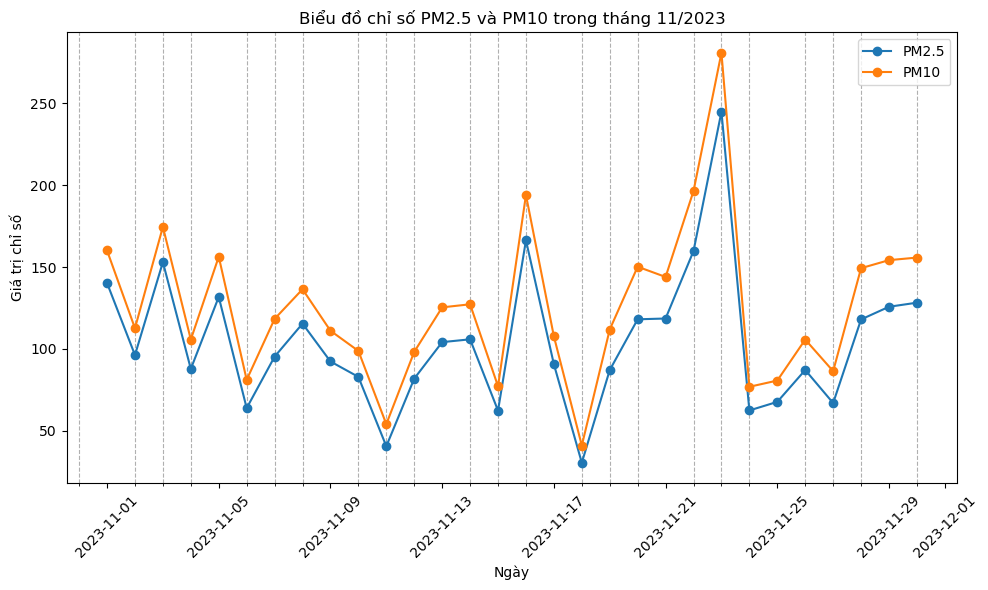

In [22]:
# Visualize data
import matplotlib.dates as mdates

# Vẽ biểu đồ đường cho pm2_5 và pm10 trong tháng 11/2023
plt.figure(figsize=(10, 6))

# Vẽ biểu đồ cho pm2_5
plt.plot(november_2023_data['dt'], november_2023_data['pm2_5'], label='PM2.5', marker='o')

# Vẽ biểu đồ cho pm10
plt.plot(november_2023_data['dt'], november_2023_data['pm10'], label='PM10', marker='o')

# Đặt các thông tin trên biểu đồ
plt.title('Biểu đồ chỉ số PM2.5 và PM10 trong tháng 11/2023')
plt.xlabel('Ngày')
plt.ylabel('Giá trị chỉ số')
plt.legend()
plt.xticks(rotation=45)  # Xoay nhãn trục x để dễ đọc hơn

# Thêm tick phụ cho trục x (tick phụ hàng ngày)
ax = plt.gca()
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))  # Tick phụ hàng ngày

# Hiển thị grid cho tick phụ
ax.xaxis.grid(True, which='minor', linestyle='--')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

##### Nhận xét:
- Biểu đồ trên thể hiện sự thay đổi của 2 chỉ số PM2.5 và PM10 trong tháng 11/2023. Có thể thấy sự thay đổi của 2 chỉ số này gần như là tương đương nhau tuy nhiên chỉ số PM10 luôn lớn hơn. Kết quả thấp nhất ghi nhân được là vào ngày `18/11/2023` với các chỉ số PM2.5 và PM10 lần lượt là `30,56` và `41,06` trong khi kết quả cao nhất ghi nhận được là vào ngày `23/11/2023` với các chỉ số PM2.5 và PM10 lần lượt là `244,75` và `280,7`.
- Cả 2 chỉ số đều thường xuyên giao động ở mức cao (trung bình của PM2.5 là 104,2 và của PM10 là 125,7) cho thấy bụi trong không khí rất nhiều, điều này cho thấy không khí đang bị nhiễm bụi khá nặng. Nguyên nhân có thể đến từ mật độ giao thông lớn của thành phố và các hoạt động công nghiệp.

#### 2. Liệu có sự thay đổi trong mức độ ô nhiễm trong các mùa khác nhau (mùa nắng, mùa mưa)?
- **Trả lời câu hỏi này** sẽ giúp phân tích sự thay đổi của ô nhiễm không khí qua các mùa khác nhau có thể giúp bạn đánh giá tác động của điều kiện thời tiết đối với chất lượng không khí. Bên cạnh đó còn có thể nắm bắt được xu hướng tăng/giảm của ô nhiễm không khí giữa các mùa có thể giúp xác định các nguyên nhân có thể gây ra sự thay đổi này, ví dụ như hoạt động công nghiệp, giao thông, hay thậm chí là điều kiện thời tiết đặc biệt. Từ đó đưa ra các biện pháp phù hợp theo từng mùa
- **Để trả lời câu hỏi này**, chúng ta sẽ so sánh trung bình của các chỉ số theo từng mùa trong năm 2022 với mùa mưa từ tháng 5 đến tháng 10 và mùa nắng là các tháng còn lại của năm.

In [23]:
# Lấy dữ liệu năm 2022
temp_df = cleaned_df[cleaned_df['dt'].dt.year == 2022]

# Tạo cột 'season' để phân loại thành mùa nắng và mùa mưa dựa trên tháng
temp_df['season'] = 'Mùa mưa'
temp_df.loc[temp_df['dt'].dt.month.isin([5, 6, 7, 8, 9, 10]), 'season'] = 'Mùa nắng'

# Tính trung bình theo từng tháng trong mùa nắng và mùa mưa
season_avg_df = temp_df.groupby('season')[['co', 'no2', 'o3', 'so2', 'pm2_5', 'pm10']].mean()

season_avg_df

C:\Users\KEN\AppData\Local\Temp\ipykernel_26904\2269781052.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['season'] = 'Mùa mưa'


,co,no2,o3,so2,pm2_5,pm10
season,,,,,,
Mùa mưa,1514.576513,45.065073,35.277280,52.273089,71.288359,88.232457
Mùa nắng,1872.144430,35.465650,10.820043,47.365602,84.418173,98.659572


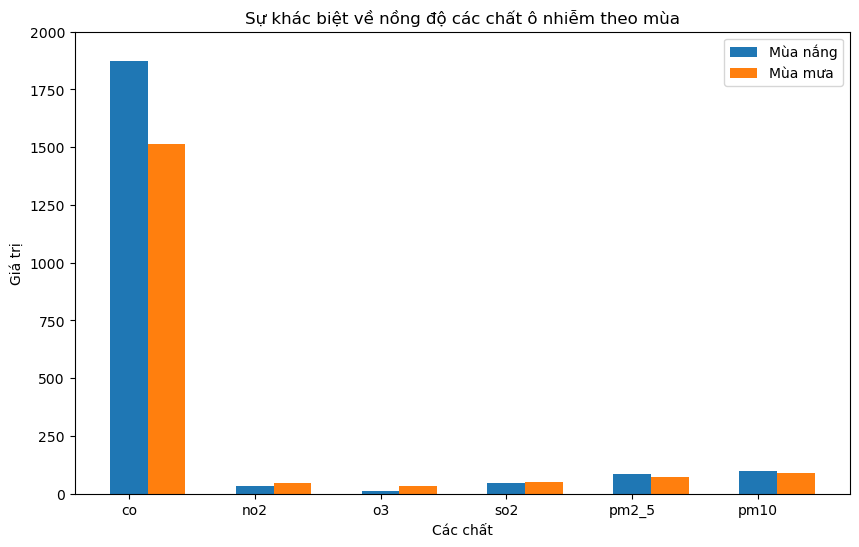

In [24]:
# Vẽ biểu đồ Grouped Bar Plot
plt.figure(figsize=(10, 6))

# Chuyển vị dữ liệu để dễ thao tác
season_avg_df_transposed = season_avg_df.T

x = range(len(season_avg_df_transposed.index))  # Đặt vị trí trục x
width = 0.3  # Đặt độ rộng của bar

sunny_values = season_avg_df_transposed['Mùa nắng'].tolist()  # Lấy giá trị của mùa nắng
rainy_values = season_avg_df_transposed['Mùa mưa'].tolist()  # Lấy giá trị của mùa mưa

plt.bar(x, sunny_values, width, label='Mùa nắng')  # Vẽ bar chart cho mùa nắng
plt.bar([i + width for i in x], rainy_values, width, label='Mùa mưa') # Vẽ bar chart cho mùa mưa 

plt.ylim(0, 2000) # Giới hạn trục y  
plt.xticks(x, season_avg_df_transposed.index)  # Đặt ticks cho trục x

# Đặt các thông tin cho biểu đồ
plt.xlabel('Các chất')  
plt.ylabel('Giá trị')  
plt.title('Sự khác biệt về nồng độ các chất ô nhiễm theo mùa')  
plt.legend() # Thêm chú thích

# Hiển thị biểu đồ
plt.show() 

- Dựa vào kết quả ở bảng và biểu đồ trên,  có thể thấy rằng các chỉ số ô nhiễm không khí có sự khác biệt đáng kể giữa mùa mưa và mùa nắng ở TP.HCM. Cụ thể:

    - Mức `CO` cao hơn ở mùa nắng (*1872.144430*) so với mùa mưa (*1514.576513*). Điều này có thể là do các nguồn phát thải CO từ các phương tiện giao thông, nhà máy, và các hoạt động đốt nhiên liệu khác thường tăng cao hơn vào mùa nắng khi nhu cầu sử dụng năng lượng cao hơn.
    - Mức `NO2` thấp hơn ở mùa nắng (*35.465650*) so với mùa mưa (*45.065073*). Điều này có thể là do các nguồn phát thải NO2 từ các phương tiện giao thông, nhà máy, và các hoạt động đốt nhiên liệu khác thường giảm thấp hơn vào mùa nắng khi thời tiết khô ráo hơn.
    - Mức `O3` thấp hơn ở mùa nắng (*10.820043*) so với mùa mưa (*35.277280*). Điều này có thể là do O3 được hình thành từ các phản ứng hóa học giữa các chất ô nhiễm không khí khác, chẳng hạn như NO2 và VOC (các hợp chất hữu cơ dễ bay hơi) dưới ánh năng mặt trời. Các phản ứng này thường xảy ra nhiều hơn vào mùa mưa khi mùa mưa ở khu vực Nam Bộ Việt Nam có xu hướng là nắng to vào ban ngày và mưa lớn vào chiều tối.
    - Mức `SO2` thấp hơn ở mùa nắng (*47.365602*) so với mùa mưa (52.273089). Điều này có thể là do các nguồn phát thải SO2 từ các nhà máy đốt than thường giảm thấp hơn vào mùa nắng khi nhu cầu sử dụng điện thấp hơn.
    - Mức `PM2.5` và `PM10` cao hơn ở mùa nắng (*84.418173* và *98.659572*) so với mùa mưa (*71.288359* và *88.232457*). Điều này có thể là do các nguồn phát thải PM2.5 và PM10, chẳng hạn như bụi, khói, và các hạt mịn từ các phương tiện giao thông, nhà máy, và các hoạt động đốt nhiên liệu khác, thường tăng cao hơn vào mùa nắng khi thời tiết khô ráo và có nhiều gió.

#### 3. Chỉ số chất lượng không khí (AQI) thay đổi như thế nào trong mỗi giờ (từ 0h đến 23h) của các ngày trong tuần (thứ 2 đến chủ nhật)?
- **Trả lời câu hỏi này** giúp ta đánh giá tình trạng chất lượng không khí theo từng khung giờ của các ngày trong tuần. Từ đó, chúng ta có thể xác định được thời điểm nào trong ngày có mức độ ô nhiễm không khí cao nhất, lúc nào có mức độ ô nhiễm không khí thấp nhất. Điều này giúp chúng ta có thể đưa ra các biện pháp phòng tránh ô nhiễm không khí phù hợp, chẳng hạn như hạn chế ra ngoài vào thời điểm ô nhiễm cao,... Bên cạnh đó còn có thể xác định nguyên nhân gây ô nhiễm không khí như các hoạt động công nghiệp, sản xuất, giao thông,.. đang diễn ra mạnh mẽ vào thời gian nào.
- **Để trả lời câu hỏi này** chúng ta sẽ tính chỉ số AQI trung bình rồi lưu vào một `matrix_aqi` có kích thước $7\times24$, trong đó mỗi phần tử biểu thị chỉ số AQI trung bình trong một giờ nhất định của một ngày trong tuần. Ví dụ. `matrix_aqi[1][8]` biểu thị chỉ số AQI trung bình vào thứ Ba từ 8h00m đến 8h59m.

In [25]:
# Lấy dữ liệu từ 2 cột 'dt' và 'aqi'
df_aqi = cleaned_df[['dt','aqi']]

# Trích xuất thứ trong tuần (weekday), trong đó: 0:Mon, 1:Tue, 2:Wed, 3:Thu, 4:Fri, 5:Sat, 6:Sun, rồi lưu vào cột 'Day of week'
df_aqi['Day of week'] = df_aqi ['dt'].dt.weekday

# Trích xuất giờ trong ngày rồi lưu vào cột 'Hour of day'
df_aqi['Hour of day'] = df_aqi ['dt'].dt.hour

df_aqi

C:\Users\KEN\AppData\Local\Temp\ipykernel_26904\1613187465.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aqi['Day of week'] = df_aqi ['dt'].dt.weekday
C:\Users\KEN\AppData\Local\Temp\ipykernel_26904\1613187465.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aqi['Hour of day'] = df_aqi ['dt'].dt.hour


,dt,aqi,Day of week,Hour of day
0,2021-01-01 00:00:00,3,4,0
1,2021-01-01 01:00:00,3,4,1
2,2021-01-01 02:00:00,3,4,2
3,2021-01-01 03:00:00,3,4,3
4,2021-01-01 04:00:00,2,4,4
...,...,...,...,...
25172,2023-11-30 20:00:00,5,3,20
25173,2023-11-30 21:00:00,5,3,21
25174,2023-11-30 22:00:00,4,3,22
25175,2023-11-30 23:00:00,3,3,23


In [26]:
# Tạo ma trận matrix_aqi 7x24
matrix_aqi = np.empty((7, 24))

for i in range(7):
    for j in range(24):
        aqi = df_aqi[(df_aqi['Day of week'] == i) & (df_aqi['Hour of day'] == j)]['aqi'].values  # Lấy danh sách chỉ số aqi theo giờ và ngày tương ứng trong tuần
        matrix_aqi[i, j] = np.mean(aqi.astype(int)) # Tính chỉ số aqi trung bình rồi lưu vào matrix_aqi[i][j] tương ứng

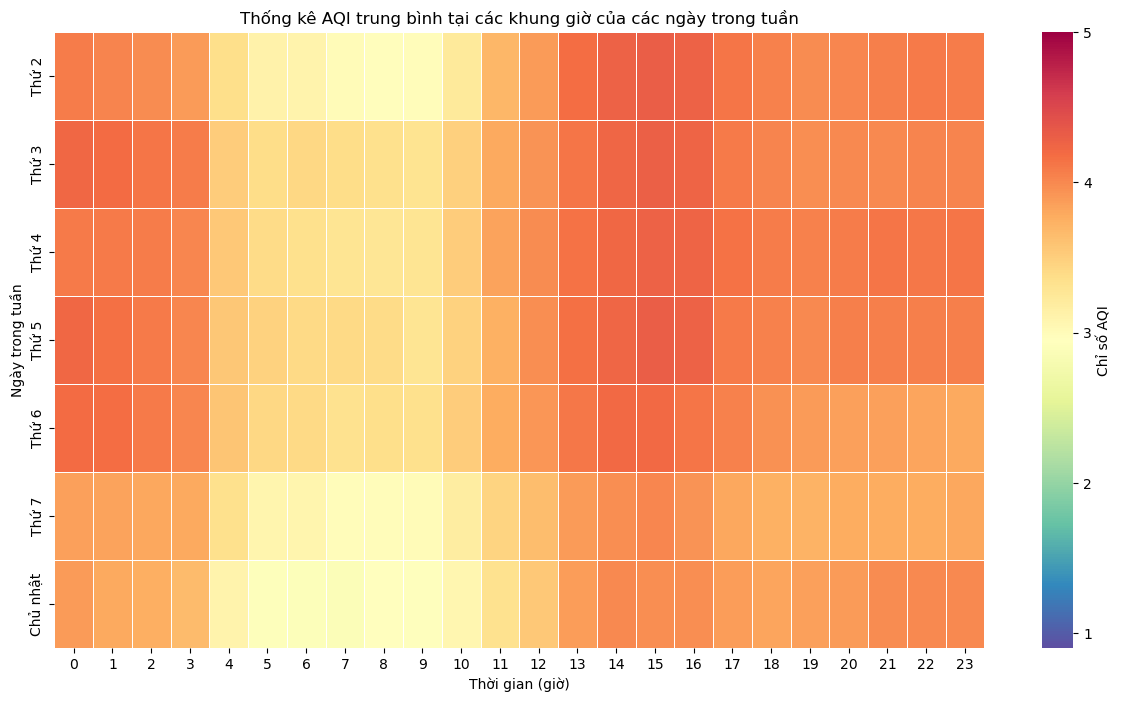

In [27]:
# Vẽ biểu đồ Heatmap 

# Tạo danh sách tên các thứ trong tuần
day_of_week = ['Thứ 2', 'Thứ 3', 'Thứ 4', 'Thứ 5', 'Thứ 6', 'Thứ 7', 'Chủ nhật']

# Vẽ biểu đồ Heatmap 
plt.figure(figsize=(15,8))
ax = sns.heatmap(matrix_aqi, linewidths=.5, yticklabels = day_of_week, vmin = 5, vmax = 1, cmap = 'Spectral_r', cbar_kws={'label': 'Chỉ số AQI', 'ticks': range(1, 6, 1)})

# Đặt các thông tin trên biểu đồ
ax.set_xlabel('Thời gian (giờ)')
ax.set_ylabel('Ngày trong tuần')
ax.set_title('Thống kê AQI trung bình tại các khung giờ của các ngày trong tuần')

plt.show()

**Nhận xét**

Dựa vào kết quả ở bảng và biểu đồ trên, có thể thấy rằng chỉ số chất lượng không khí AQI có sự thay đổi qua từng khung giờ và từng ngày trong tuần. Cụ thể như sau:
- Ta có thể quan sát thấy, chỉ số `AQI` trung bình của TP.HCM dao động ở mức từ *2-4*, nghĩa là chất lượng không khí từ *mức khá đến kém*. Tuy nhiên, đa số các khoảng thời gian thì chỉ số `AQI` trung bình chủ yếu từ *3-4*, nghĩa là chất lượng không khí ở TP.HCM đa số ở mức từ *trung bình đến kém*. 
- Vào các *ngày thứ 2, thứ 7 và chủ nhật*, vào khung giờ từ *4h đến 10h* sáng chỉ số `AQI` ở khoảng mức *2-3* nghĩa là chất lượng không khí ở TP.HCM đạt mức *khá đến trung bình* vào thời điểm này. Còn ở các *ngày thứ 3, thứ 4, thứ 5 và thứ 6*, từ *4h đến 10h* sáng chỉ số `AQI` ở khoảng mức *3-4* nghĩa là chất lượng không khí ở mức *trung bình đến kém*. Ở các khung giờ còn lại từ *11h trưa đến 3h sáng*, chỉ số `AQI` khoảng mức *4*, nghĩa là chất lượng không khí đang ở mức *kém*. Điều này cho thấy, các hoạt động công nghiệp, sản xuất, giao thông ở TP.HCM... diễn ra chủ yếu vào buổi trưa, chiều và tối. Còn thời gian buổi sáng, chất lượng không khí tương đối trong lành.
- Các chỉ số `AQI` ở các ngày *thứ 2, thứ 7 và chủ nhật* có xu hướng *thấp hơn* các ngày còn lại trong tuần ở cùng các khung giờ. Đặc biệt các ngày *thứ 4 và thứ 5*, chỉ số `AQI` ở các khung giờ thường ở mức *cao nhất* so với các ngày còn lại. Điều này có thể cho thấy mức độ hoạt động của con người, các hoạt động công nghiệp thường có xu hướng diễn ra mạnh mẽ ở các ngày giữa tuần. Còn các ngày cuối tuần, các nhà máy, khu công nghiệp, các hoạt động sản xuất có thể được tạm dừng nên chất lượng không khí vào các ngày cuối tuần thường khá hơn các ngày trong tuần.
